In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [7]:
x = np.array([1,2])
x+x

array([2, 4])

In [8]:
np.dot(x,x)

5

In [9]:
x @ x

5

In [15]:
A = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])

In [16]:
def GetZ(A,b,x,y,i):
    return (b[i]-A[i,0]*x-A[i,1]*y)/A[i,2]

In [17]:
x = np.linspace(0,2,10)
y = np.linspace(0,2,10)
X,Y = np.meshgrid(x,y)

<IPython.core.display.Javascript object>


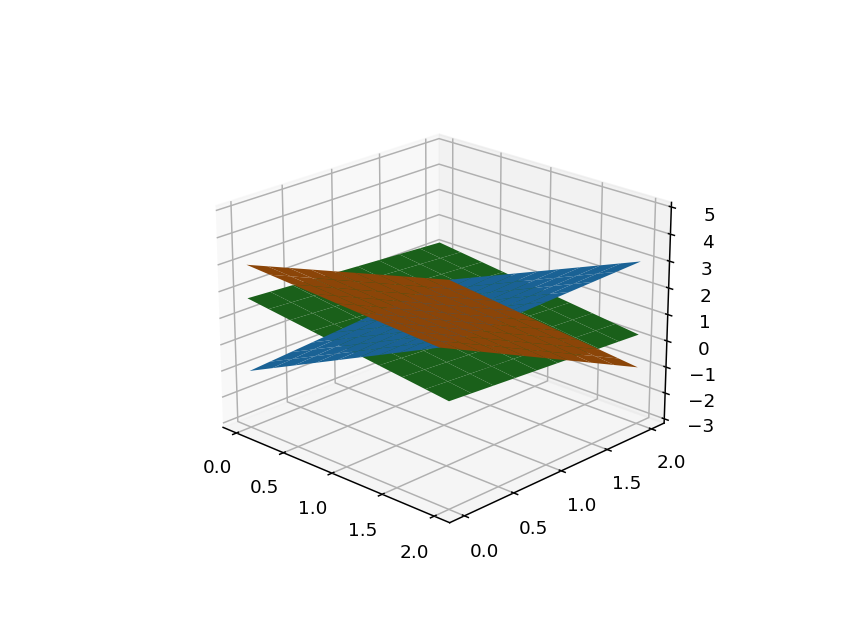

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for i in range(3):
    ax.plot_surface(X,Y,GetZ(A,b,X,Y,i))

In [33]:
def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(itmax):
        
        xn = np.zeros_like(x0)
        
        for i in range(A.shape[0]):
            
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            xn[i] = (b[i] - sum_)/A[i,i]
            
        print(it,xn)
        
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        #print(residuo)
        
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x

In [34]:
x0 = np.array([0.,0.,0.])
Jacobi(A,b,x0)

0 [0.33333333 1.         1.75      ]
1 [1.25       0.52777778 1.33333333]
2 [0.9537037  0.97222222 0.99305556]
3 [0.98842593 0.98688272 1.03009259]
4 [1.00565844 0.98611111 1.00906636]
5 [0.99839249 0.99886403 1.000643  ]
6 [0.99983568 0.99924983 1.00108775]
7 [1.00011253 0.99958264 1.0002697 ]
8 [0.99995078 0.99994761 1.00004808]
9 [0.99999856 0.99996757 1.00003771]
10 [1.00000176 0.99998695 1.00000883]
11 [0.99999859 0.99999764 1.00000238]
12 [1.00000001 0.99999874 1.00000129]
13 [1.00000001 0.99999957 1.00000031]
14 [0.99999996 0.9999999  1.0000001 ]
15 [1.         0.99999995 1.00000004]
16 [1.         0.99999999 1.00000001]
17 [1. 1. 1.]
18 [1. 1. 1.]
19 [1. 1. 1.]


array([1., 1., 1.])

In [35]:
def GetTMatrix(A):
    
    M,N = A.shape
    
    D = np.zeros_like(A)
    R = D.copy()
    T = D.copy()
    
    for i in range(M):
        for j in range(N):
            if i == j:
                D[i,j] = 1/A[i,j]
            else:
                R[i,j] = A[i,j]
                
    T = np.dot(D,R)
    
    return T

In [36]:
T = GetTMatrix(A)
T

array([[ 0.        , -0.33333333, -0.33333333],
       [-0.33333333,  0.        ,  0.33333333],
       [ 0.5       ,  0.25      ,  0.        ]])

In [37]:
valores, vectores = np.linalg.eig(T)
valores

array([-0.33333333+0.j        ,  0.16666667+0.23570226j,
        0.16666667-0.23570226j])

In [38]:
print(np.amax(np.abs(valores)))

0.33333333333333315
